**Student: C0904838, Haldo Somoza**

**Date: Jul 07, 2024**

GitHub Repository: https://github.com/haldosomoza/2024S-T3-AML-3104-.git

---
PROFESSOR INSTRUCTIONS: 

Assignment: Fashion MNIST Classification with Artificial Neural Networks (ANNs) and Visualizations

Objective: The objective of this assignment is to build an Artificial Neural Network (ANN) model using the Fashion MNIST dataset available in Keras. You will create visualizations, compile the model, and evaluate its performance on both training and validation sets. Finally, use the trained model to predict on the test data.

---
### 1. Load and Explore the Fashion MNIST Dataset:

Load the Fashion MNIST dataset from Keras. Familiarize yourself with the dataset's structure and the classes it contains.

In [78]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

# loading the Kera's Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# showing the loaded dataset
print(f"Train set shape: {train_images.shape}, {train_labels.shape}")
print(f"Test  set shape: {test_images.shape},  {test_labels.shape}")


Train set shape: (60000, 28, 28), (60000,)
Test  set shape: (10000, 28, 28),  (10000,)


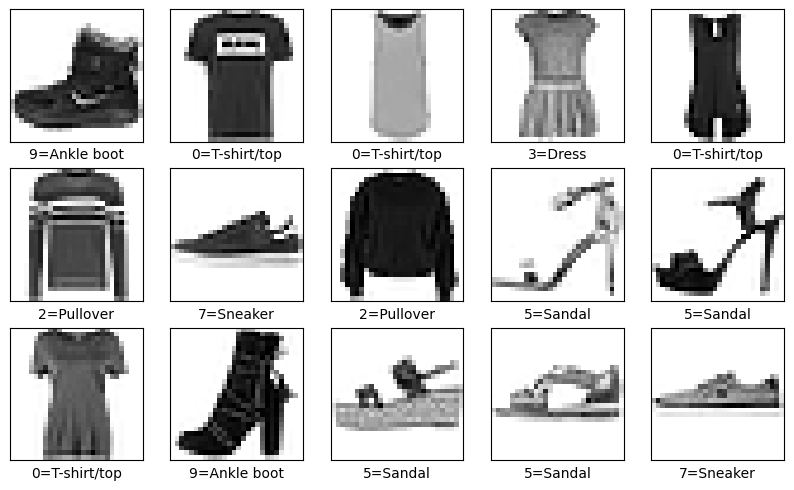

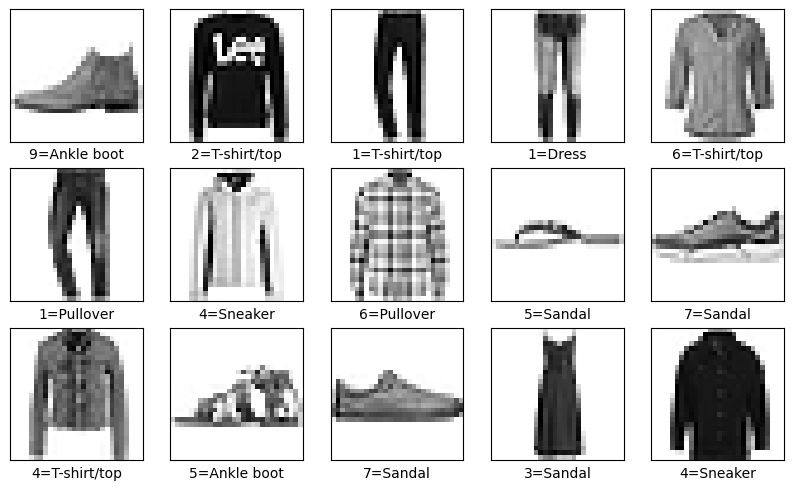

In [79]:
# getting the class names according to the keras documentation
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

import matplotlib.pyplot as plt

# showing a sample of the images in train_images and their labels
def plot_train_images(train_images, train_labels, class_names):
    plt.figure(figsize=(10,10))
    for i in range(15):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(str(train_labels[i])+"="+class_names[train_labels[i]])
    plt.show()
plot_train_images(train_images, train_labels, class_names)

# showing a sample of the images in test_images and their labels
def plot_test_images(test_images, test_labels, class_names):
    plt.figure(figsize=(10,10))
    for i in range(15):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(test_images[i], cmap=plt.cm.binary)
        plt.xlabel(str(test_labels[i])+"="+class_names[train_labels[i]])
    plt.show()
plot_test_images(test_images, test_labels, class_names)

---
### 2. Data Preprocessing:

Preprocess the data as needed for training an ANN. This may include scaling the pixel values to a range between 0 and 1 and reshaping the data.

Train range imagen previous to scale:  0 255
Train range imagen previous to scale:  0 255
Train range imagen after scaling:  0.0 1.0
Train range imagen after scaling:  0.0 1.0
Train set shape after reshaping: (60000, 28, 28, 1)
Test  set shape after reshaping: (10000, 28, 28, 1)


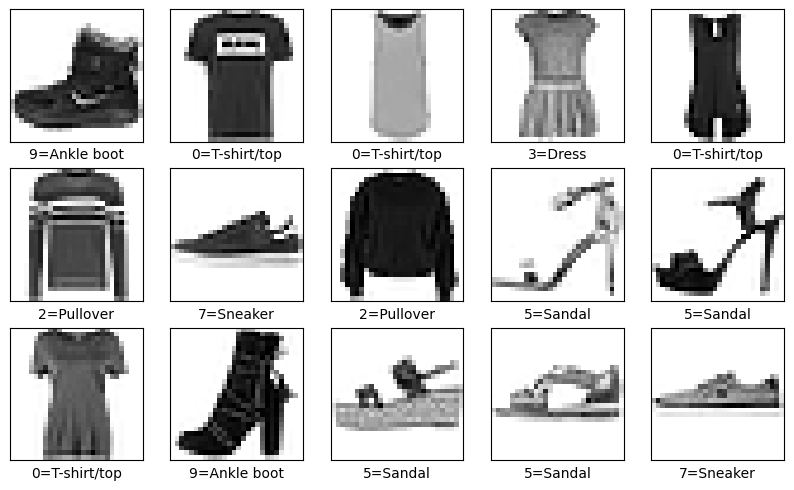

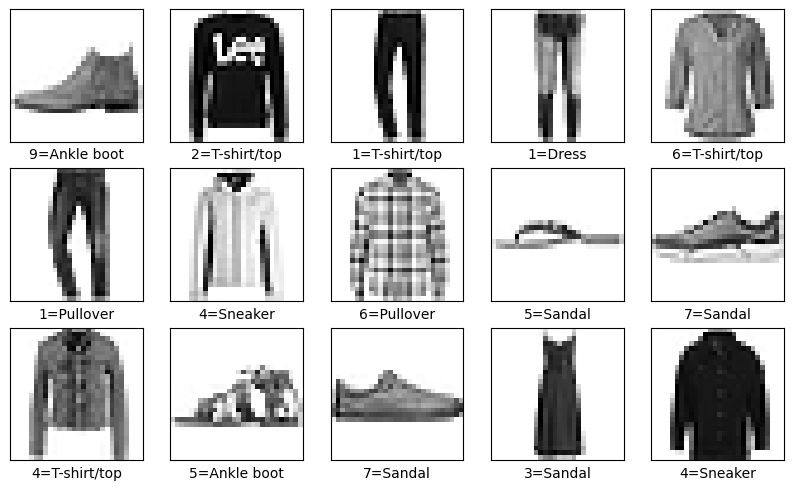

In [80]:
# scaling pixel values to range 0-1
print("Train range imagen previous to scale: ", train_images.min(), train_images.max())  
print("Train range imagen previous to scale: ", test_images.min(),  test_images.max())  
train_images = train_images / 255.0
test_images  = test_images  / 255.0
print("Train range imagen after scaling: ", train_images.min(), train_images.max()) 
print("Train range imagen after scaling: ", test_images.min(),  test_images.max())  

# reshaping the data as a good practice for this kind of models
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images  = test_images .reshape((test_images.shape[0],  28, 28, 1))
# cheking the shapes after reshaping
print(f"Train set shape after reshaping: {train_images.shape}")
print(f"Test  set shape after reshaping: {test_images.shape}")

# showing the images to ensure have no changes
plot_train_images(train_images, train_labels, class_names)
plot_test_images (test_images,  test_labels,  class_names)

---
### 3. Visualizations:

Create visualizations to explore the dataset. Include at least:
- Display sample images from the dataset.
- A bar chart showing the distribution of samples across different classes.

<Figure size 1000x1000 with 0 Axes>

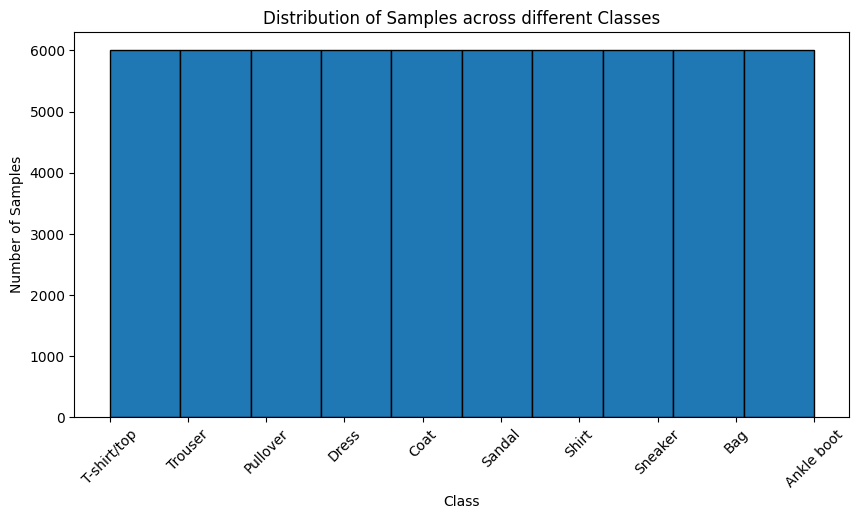

In [81]:
# IMAGES HAVE BEEN SHOWN SINCE PREVIOUS STEPS

# showing a bar chart with the distribution of samples across different classes
def plot_class_distribution(labels, class_names):
    plt.figure(figsize=(10,10))
    plt.figure(figsize=(10,5))
    plt.hist(labels, edgecolor='black')
    plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.title('Distribution of Samples across different Classes')
    plt.show()

plot_class_distribution(train_labels, class_names)

# NOTICED: THERE ARE THE SAME NUMBER OF SAMPLES FOR EACH CLASS !!!

---
### 4. Build an Artificial Neural Network:

Design and implement an ANN model for classifying Fashion MNIST images. Experiment with different architectures, activation functions, and layer configurations.

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# buildinf one ANN model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# printing the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---
### 5. Compile the Model:

Compile the ANN model using an appropriate loss function, optimizer, and evaluation metric. Choose metrics such as accuracy to monitor during training.

In [83]:
# compiling the model with the optimizer, loss function and metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

---
### 6. Train the Model:

Train the compiled model on the training set. Monitor and visualize the training process using training loss and accuracy.

In [84]:
# training the model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5629 - accuracy: 0.7951 - val_loss: 0.4260 - val_accuracy: 0.8407
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4129 - accuracy: 0.8491 - val_loss: 0.3827 - val_accuracy: 0.8601
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3782 - accuracy: 0.8608 - val_loss: 0.3673 - val_accuracy: 0.8668
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3546 - accuracy: 0.8687 - val_loss: 0.3402 - val_accuracy: 0.8748
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3402 - accuracy: 0.8716 - val_loss: 0.3382 - val_accuracy: 0.8798
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3242 - accuracy: 0.8800 - val_loss: 0.3434 - val_accuracy: 0.8755
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3158 - accuracy: 0.8816 - val_loss: 0.3265 - val_accuracy:

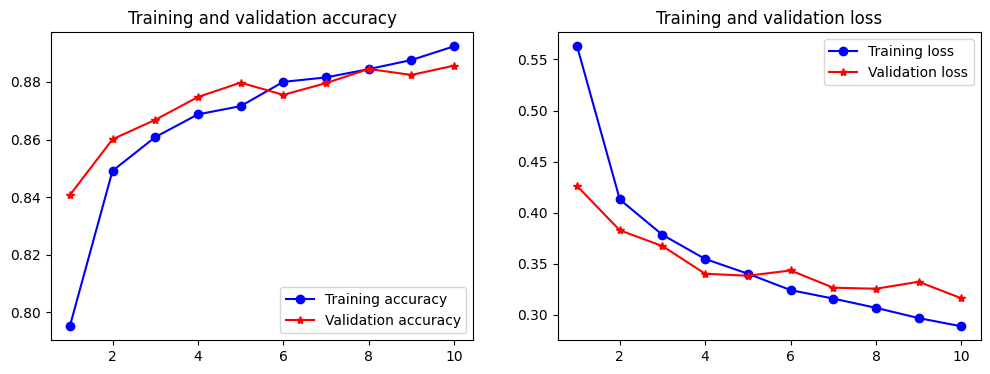

In [85]:
# plotting training and validation loss and accuracy
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r*-', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'r*-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_training_history(history)

---
### 7. Evaluate the Model:

Evaluate the trained model on the validation set. Calculate and visualize both training and validation losses and accuracy.

In [86]:
# calculating the accuracy of the dataset
train_loss, train_acc = model.evaluate(train_images, train_labels)
test_loss,  test_acc  = model.evaluate(test_images,  test_labels)

print(f"Train accuracy: {train_acc:.4f}")
print(f"Test  accuracy: {test_acc:.4f}")

# VISUALIZATION OF LOSS AND ACCURACY HAVE BEEN SHOWN IN PREVIOUS STEPS

313/313 [==============================] - 1s 2ms/step - loss: 0.3404 - accuracy: 0.8788
Train accuracy: 0.9053
Test  accuracy: 0.8788


---
### 8. Test Set Prediction:

Use the trained model to predict classes for the test set. Display a few sample predictions along with the corresponding images.

In [87]:
# using the model to predict classes for the test dataset
predictions = model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


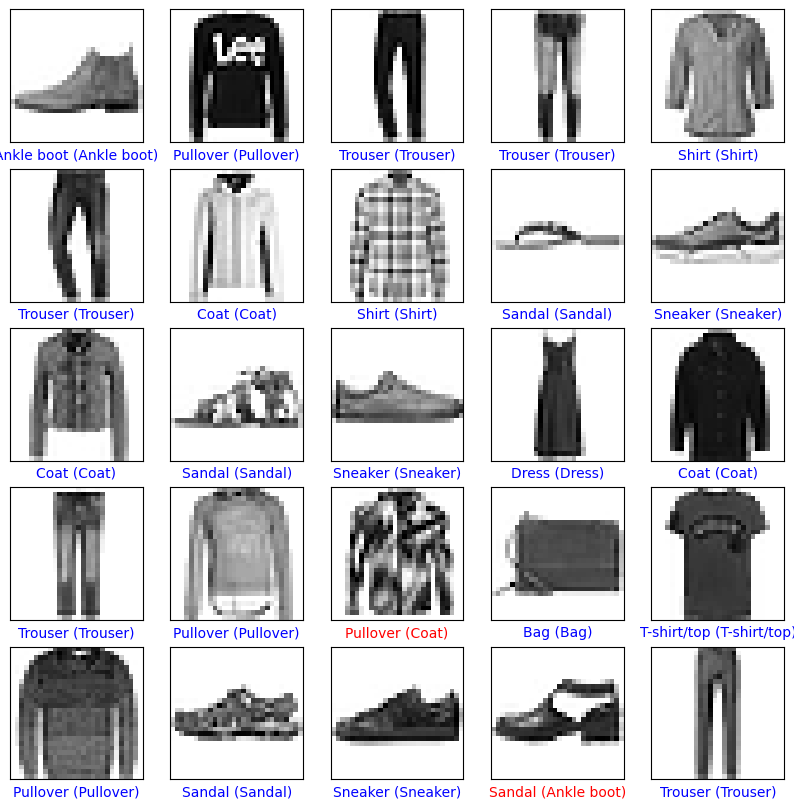

In [88]:
# plotting the images and the predicted classes
def plot_sample_predictions(images, labels, predictions, class_names):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        true_label = labels[i]
        color = 'blue' if predicted_label == true_label else 'red'
        plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)
    plt.show()

plot_sample_predictions(test_images, test_labels, predictions, class_names)